In [12]:
! pip install opencv-python

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [14]:
mnist = tf.keras.datasets.mnist
mnist

<module 'keras.api.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/datasets/mnist/__init__.py'>

In [15]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [16]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


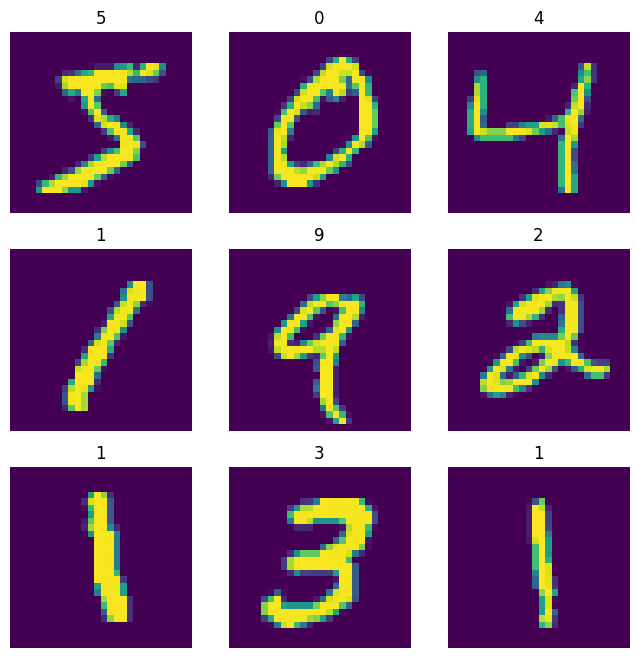

In [17]:
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.axis('off')

In [19]:
x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)

In [20]:
import tensorflow as tf

model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'softmax'))

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           4,224 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 115,040 (449.38 KB)

 Trainable params: 115,040 (449.38 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [23]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8075 - loss: 0.7532 - val_accuracy: 0.9519 - val_loss: 0.1566
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9596 - loss: 0.1369 - val_accuracy: 0.9644 - val_loss: 0.1139
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9714 - loss: 0.0940 - val_accuracy: 0.9616 - val_loss: 0.1176
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9780 - loss: 0.0690 - val_accuracy: 0.9702 - val_loss: 0.0969
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9828 - loss: 0.0548 - val_accuracy: 0.9704 - val_loss: 0.0991
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9870 - loss: 0.0398 - val_accuracy: 0.9753 - val_loss: 0.0873
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9888 - loss: 0.0348 - val_accuracy: 0.9727 - val_loss: 0.0978
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9903 - loss: 0.0299 -

In [24]:
import cv2

In [1]:
image = cv2.imread([0])[:,:, 0]
image = np.invert(np.array([image]))

NameError: name 'cv2' is not defined

1/1 [==============================] - 0s 18ms/step


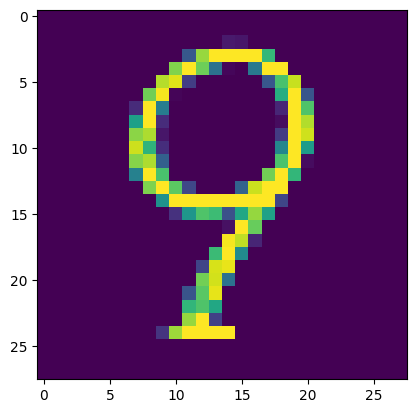

8


In [ ]:
output = model.predict(image)
plt.imshow(image[0])  # Assuming the image is grayscale, otherwise adjust the cmap
plt.show()
print(np.argmax(output))


In [ ]:
model.save('hand_written_Digitis_recog_model.keras')